In [1]:
import scipy.spatial.distance

"""Some important Ptolemaic metric spaces are 4-embeddable into R^3.
Connor mentions a tetrahedron lower bound: When all but one distances
between four points are known, the last one can be lower bounded as the
shortest side of a tetrahedron. This would be a degenerate tetrahedron,
with the two known triangles sharing one side and lying in the same plane.
"""

'Some important Ptolemaic metric spaces are 4-embeddable into R^3.\nConnor mentions a tetrahedron lower bound: When all but one distances\nbetween four points are known, the last one can be lower bounded as the\nshortest side of a tetrahedron. This would be a degenerate tetrahedron,\nwith the two known triangles sharing one side and lying in the same plane.\n'

In [2]:
import numpy as np
from sympy import *
#from algebra_with_sympy import *

init_printing(use_latex='mathjax')

dist_prop = dict(real=True, positive=True)
# generic symbols
A, s, a, b, c, h = symbols("A s a b c h", **dist_prop)

# Heron
semiperimeter = {s: (a + b + c) / 2}
area = sqrt(s * (s - a) * (s - b) * (s - c))

height_over_a = 2 / a * area.subs(semiperimeter)

area, semiperimeter

⎛     ____________________________  ⎧   a   b   c⎫⎞
⎜√s⋅╲╱ (-a + s)⋅(-b + s)⋅(-c + s) , ⎨s: ─ + ─ + ─⎬⎟
⎝                                   ⎩   2   2   2⎭⎠

![](img.png)

In [3]:
# we have two pivots, a query (center) and an object
# we want to lower bound d(q,o)
# we know all other distances

# the two resulting triangles have a shared base p0-p1 of length p
p = symbols("p", **dist_prop)

# the query triangle has these other sides:
q0, q1 = symbols("q:2", **dist_prop)

# dito for the object triangle
o0, o1 = symbols("o:2", **dist_prop)

# we are repeating a lot of steps for both triangles
def q2o(term):
    subs = {q0:o0, q1:o1}
    return term.subs(subs)

In [4]:
# these triangles have heights that we can infer via Heron
hq = height_over_a.subs({
    a: p, b: q0, c: q1
})
hq = factor(hq)
ho = q2o(hq)

hq

  ____________________________________________   _____________
╲╱ -(p - q₀ - q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ 
──────────────────────────────────────────────────────────────
                             2⋅p                              

In [5]:
# the height "bisects" the shared base at these lengths,
# measured from one of the two possible vertices:
mq0 = factor(sqrt(q0**2 - hq**2))
mo0 = q2o(mq0)

mo0

│  2     2    2│
│o₀  - o₁  + p │
────────────────
      2⋅p       

In [6]:
# We know the height of the triangle w.r.t. q.
# Let's figure out the "width" or the "x-position" of the point q.

# Let q0 be on the left and q1 be on the right.
# If the triangle is acute:
m_ac = mq0

# If the triangle is obtuse, we have two cases:
# One where the point is to the left:
mob_left = -mq0
# And one where the point is to the right:
mob_right = mq0 # which is identical to m_ac

# left obtuse means that q1 has to be the longest side and
# that q1**2 > p**2 + q1**2
mq = Piecewise(
    (mob_left,  q1**2 > p**2 + q0**2), # And(And(q1 > p, q1 > q0) ,
    (m_ac, True)
)

mq

⎧ │ 2     2     2│                     
⎪-│p  + q₀  - q₁ │         2    2     2
⎪──────────────────  for q₁  > p  + q₀ 
⎪       2⋅p                            
⎨                                      
⎪ │ 2     2     2│                     
⎪ │p  + q₀  - q₁ │                     
⎪ ────────────────       otherwise     
⎩       2⋅p                            

In [7]:
# but this is just the same formula with the abs() removed
mq_new = mq.args[1][0]
simplify(mq_new -  mq)

⎧│ 2     2     2│                    
⎪│p  + q₀  - q₁ │        2    2     2
⎪────────────────  for q₁  > p  + q₀ 
⎨       p                            
⎪                                    
⎪       0              otherwise     
⎩                                    

In [8]:
mq = mq_new
mo = q2o(mq)

In [9]:
# construct the right triangle which hypotenuse of length d connects q and o
# from h and m s

lb2 = (hq - ho) ** 2 + (mq - mo) ** 2

lb2 = simplify(lb2)
dist = simplify(sqrt(lb2))
lb2 # Mathematica can't simplify this any further

                                                                                                                                 2                                        2
⎛  ____________________________________________   _____________     ____________________________________________   _____________⎞    ⎛│  2     2    2│   │ 2     2     2│⎞ 
⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  - ╲╱ (-p + q₀ + q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ ⎠  + ⎝│o₀  - o₁  + p │ - │p  + q₀  - q₁ │⎠ 
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                       2                                                                                   
                                                                                    4⋅p                                                     

In [10]:
# we can also find an upper bound this way:
# arrange the triangles so that one height is positive and one is negative:
ub2 = (hq + ho)**2 + (mq - mo)**2
ub2 = simplify(ub2)
ub2

                                                                                                                                 2                                        2
⎛  ____________________________________________   _____________     ____________________________________________   _____________⎞    ⎛│  2     2    2│   │ 2     2     2│⎞ 
⎝╲╱ (-o₀ + o₁ + p)⋅(o₀ - o₁ + p)⋅(o₀ + o₁ - p) ⋅╲╱ o₀ + o₁ + p  + ╲╱ (-p + q₀ + q₁)⋅(p - q₀ + q₁)⋅(p + q₀ - q₁) ⋅╲╱ p + q₀ + q₁ ⎠  + ⎝│o₀  - o₁  + p │ - │p  + q₀  - q₁ │⎠ 
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                       2                                                                                   
                                                                                    4⋅p                                                     

In [21]:
# test with a simple triangle:
tri0 = {
    p:3,
    q0:7,
    q1:5,
}
tri1 = {
    p:tri0[p],
    o0:10.77,
    o1:12.21,
}

height0 = 4.33
m_base0 = 5.5
precision = 0.02

assert N(abs(hq.subs(tri0) - height0)) < precision, "wrong height!"
assert N(abs(mq0.subs(tri0) - m_base0)) < precision, "wrong intersect!"

true_dist = 11.06
this_lb = N(sqrt(lb2).subs(tri0).subs(tri1))
this_ub = N(sqrt(ub2).subs(tri0).subs(tri1))
assert this_lb <= true_dist
assert this_ub >= true_dist
#assert np.allclose(dist_n, , atol=precision), dist_n

In [23]:
this_lb, this_ub

(5.85482761542219, 14.4004303266843)

In [24]:
# test with a "hard" triangle
trih = {
    p:32.44996148,
    q0:65.76473219,
    q1:38.83297568,
    o0:64.5368112 ,
    o1:36.22154055,
}

assert np.abs(hq.subs(trih) - 27.74) < precision
assert np.abs(ho.subs(trih) - 23.3) < precision
mq0.subs(trih) - 32.45, mo0.subs(trih) - 32.45

assert np.allclose(float(dist.subs(trih)), 4.47, atol=precision)

In [ ]:


# some mappings are too simple to be worth the rewriting
def eliminate_mappings(mappings, expressions, ignore_idx):
    ignore = [mappings[i] for i in ignore_idx]
    mappings = [i for i in mappings if i not in ignore]

    ignore = [(m[0],m[1].subs(ignore)) for m in ignore]
    mappings = [(m[0], m[1].subs(ignore)) for m in mappings]
    expressions = [e.subs(ignore) for e in expressions]
    return mappings, expressions

ignore_idx = [0,3,7]
mappings, expressions = eliminate_mappings(*cse([lb2,ub2]), ignore_idx)
expressions 

In [ ]:
# TODO: refactor me
def piecewise_to_maca(term:Piecewise, pretty=False):
    """Return Mathematica code for Piecewise objects.
    
    mathematica_code(term) cannot handle Piecewise objects.
    """
    pieces = []

    def to_maca(term):
        return mathematica_code(term)

    for term, condition in term.args:
        pieces.append(
            "{" + to_maca(term) + "," + to_maca(condition) + "}"
        )
    
    if not pretty:
        args = ",".join(pieces)
    else:
        args = ",\n".join(pieces)
        args = "\n" + args + "\n"
        
    return "Piecewise[{"+args+"}]"

In [ ]:
from sympy.parsing.mathematica import parse_mathematica

def from_maca(string, free_symbols):
    term = parse_mathematica(string)
    term = term.replace(Function("Abs"), abs)
    # symbols don't get matched automatically
    for s in free_symbols:
        term = term.replace(symbols(str(s)),s)
    return term

string = """
(1/(4 p^2))((Sqrt[(o0 + o1 - p) (o0 - o1 + p) (-o0 + o1 + p) (o0 + 
       o1 + p)] - 
    Sqrt[(p + q0 - q1) (p - q0 + q1) (-p + q0 + q1) (p + q0 + 
       q1)])^2 + (Abs[o0^2 - o1^2 + p^2] - Abs[p^2 + q0^2 - q1^2])^2)
"""
free_symbols = [p,q0, q1, o0, o1]
mdist = from_maca(string, free_symbols)

mdist

In [25]:
#connor_diff = lambdify([p,q0, q1, o0, o1], lb - dist, "numpy")
tetrahedron_lb = lambdify([p,q0, q1, o0, o1], sqrt(lb2), "numpy")
tetrahedron_ub = lambdify([p,q0, q1, o0, o1], sqrt(ub2), "numpy")

def ptolemy_lb(p, q0, q1, o0, o1):
    diff = np.abs(q0 * o1 - q1 * o0)
    return diff / p

In [26]:
from tqdm import tqdm

def _stable_tetrahedron_lb(p_n, q0_n, q1_n, o0_n, o1_n):
    for i in tqdm(range(len(p_n))):
        yield dist.subs({
            p:p_n[i],
            q0:q0_n[i],
            q1:q1_n[i],
            o0:o0_n[i],
            o1:o1_n[i],
        }).evalf()

def stable_tetrahedron_lb(p_n, q0_n, q1_n, o0_n, o1_n):
    return np.asarray(list(_stable_tetrahedron_lb(p_n, q0_n, q1_n, o0_n, o1_n)), dtype=float)

/tmp/ipykernel_395530/430937231.py:7: RuntimeWarning: invalid value encountered in divide
  return diff / p


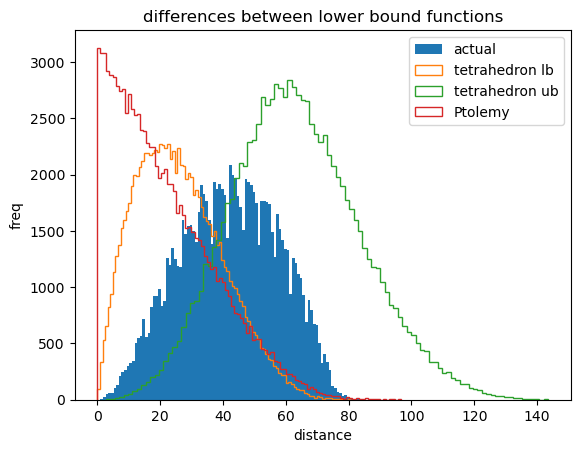

In [30]:
# simulate triangles
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
rng = np.random.default_rng()

dist_func = lambda x,y: spatial.minkowski_distance(x,y,5)# np.linalg.norm(x-y, axis=-1)
n_samples= 100000
dim = 3
points = rng.integers(-37,38, size=[n_samples, 4, dim])
p0,p1,q,o = 0,1,2,3
dists_p = dist_func(points[:,p0,:], points[:,p1,:])
dists_q0 = dist_func(points[:,p0,:], points[:,q,:])
dists_q1 = dist_func(points[:,p1,:], points[:,q,:])
dists_o0 = dist_func(points[:,p0,:], points[:,o,:])
dists_o1 = dist_func(points[:,p1,:], points[:,o,:])
dists_target = dist_func(points[:,q,:], points[:,o,:])

args = np.vstack((dists_p, dists_q0, dists_q1, dists_o0, dists_o1))
tet_lb = tetrahedron_lb(*args)
tet_ub = tetrahedron_ub(*args)
pto_n = ptolemy_lb(*args)
#connors_lb_n = connor_lb(*args)
#connors_lb_n = np.clip(connors_lb_n, -10, 200)

bins = 100
plt.hist(dists_target,  bins=bins, label="actual")
plt.hist(tet_lb, bins=bins, histtype="step", label="tetrahedron lb")
plt.hist(tet_ub, bins=bins, histtype="step", label="tetrahedron ub")
plt.hist(pto_n, bins=bins, histtype="step", label="Ptolemy")
#plt.hist(connors_lb_n, bins=bins, histtype="step", label="connor")

plt.title("differences between lower bound functions")
plt.xlabel("distance")
plt.ylabel("freq")
plt.legend()
plt.show()

In [39]:
violations = (dists_target - tet_lb) / dists_target < -0.01
sum(violations) / len(tet_lb)

np.float64(0.10193)

In [31]:
def violations(lb):
    return (dists_target < lb).sum() / len(dists_target)
violations_tet = violations(tet_lb)
violations_pto = violations(pto_n)
violations_tet, violations_pto

(0.11566, 0.07082)

In [ ]:
plt.hist(pto_n - tet_lb, bins=100);

In [ ]:
plt.hist(dists_target - tet_lb, histtype="step", bins=100);
#plt.hist(tet_ub - dists_target, histtype="step");

In [ ]:
problems = np.abs(dists_target - my_lb_n) > 0.01
ppoints = points[problems,:,:]

plt.plot(*ppoints[0][:2].T)
for p in ppoints[0]:
    plt.plot(*p, "o")
    
plt.show()